## Task 2: Classical ML model ##
Choosing wisely: n=298, and a "classical" approach must be made. We will proceed with Random Forest.


In [10]:
# Import necessary libraries
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc,accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import os


In [11]:
# Step 1: Data Collection and Preprocessing
database = pd.read_csv(os.path.join('..', 'data', 'dataset.csv'))

# Data preprocessing steps here...
# Cutoff point is set at 30 days, so all of those patients with higher time values are still alive for the sake of the model
database.loc[database['time'] > 30, 'DEATH_EVENT'] = 0

# Split data into features and target variable. Will also exclude time, as we are only thinking about whether that person is alive in 30 dayss or not.
X = database.drop(columns=['DEATH_EVENT', 'time'])  

y = database['DEATH_EVENT']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 2: Model Training
model = RandomForestClassifier()  # Example: You can use any other suitable classifier
model.fit(X_train, y_train)

# Step 3: Model Evaluation
predictions = model.predict(X_test)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)


In [12]:
# Step 4: Saving the Model
joblib.dump(model, (os.path.join('..', 'models', 'ml-model2.model')))

['..\\models\\ml-model2.model']

In [13]:
# Validation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.9
Precision: 0.6666666666666666
Recall: 0.2857142857142857
F1 Score: 0.4
ROC AUC Score: 0.6334231805929919


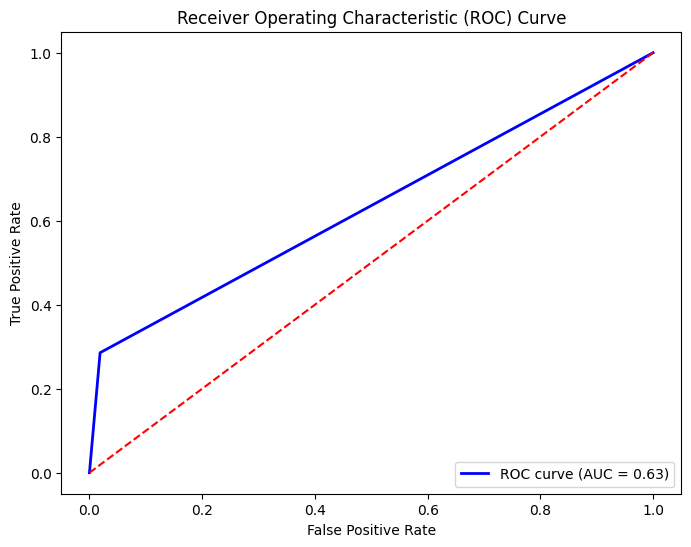

Accuracy: 0.90
Confusion Matrix:
[[52  1]
 [ 5  2]]


In [14]:
# Create confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Display accuracy and confusion matrix
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)